In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.utils import resample
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

# Question 1 . A

In [2]:
NOxEmissions = pd.read_csv('NOxEmissions.csv')

In [3]:
NOxEmissions.head(3)

,rownames,julday,LNOx,LNOxEm,sqrtWS
0,193,373,4.457250,5.536489,0.856446
1,194,373,4.151827,5.513000,1.016612
2,195,373,3.834061,4.886994,1.095445


In [4]:
# it is mentioned in the requirement that the time dependency will be omitted,
# therefore droping the julday column. 
# rownames column is unnecessary hence droping it as well.

NOxEmissions = NOxEmissions.drop(columns=['rownames','julday'])

# checking if there are any null values

null_values = NOxEmissions.isnull().sum()
print(null_values)

LNOx      0
LNOxEm    0
sqrtWS    0
dtype: int64


In [5]:
# checking if there are any duplicate values

duplicates = NOxEmissions[NOxEmissions.duplicated()]

if duplicates.empty:
    print("No duplicate values found.")
else:
    print("Duplicate values found:")
    print(duplicates)

No duplicate values found.


# Question 1 . B

In [6]:
summary_stats = NOxEmissions['LNOx'].describe()
print(summary_stats)

count    8088.000000
mean        4.378691
std         0.937389
min        -0.105361
25%         3.891820
50%         4.497028
75%         5.012134
max         6.576121
Name: LNOx, dtype: float64


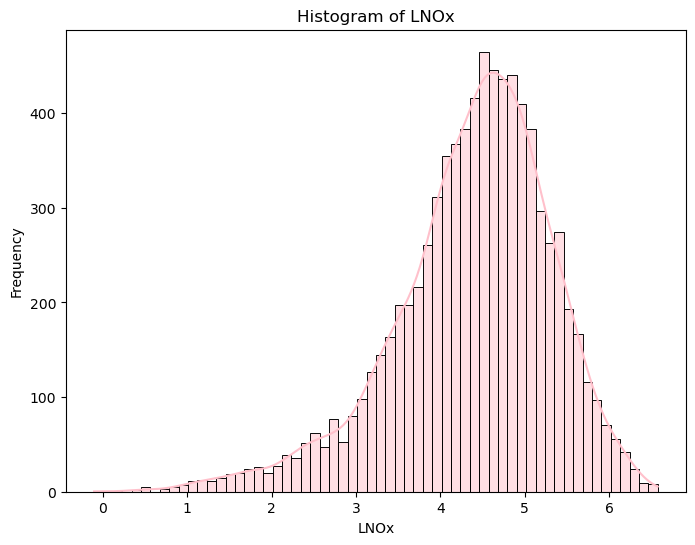

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(NOxEmissions['LNOx'], kde=True, color='pink')
plt.title('Histogram of LNOx')
plt.xlabel('LNOx')
plt.ylabel('Frequency')
plt.show()

The highest frequency of LNOx values falls within the bin between 4 and 5. This means there are more data points with LNOx values between 4 and 5 than any other range. Moreover, the overall shape of the distribution appears symmetrical, which suggests the data might be normally distributed.

# Question 1 . C

In [8]:
X = NOxEmissions[['LNOxEm','sqrtWS']]
y = NOxEmissions['LNOx']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 0)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

y_pred = linear_regressor.predict(X_test)

In [9]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df['Difference'] = comparison_df['Actual'] - comparison_df['Predicted']
comparison_df.head(3)

,Actual,Predicted,Difference
4947,4.945919,4.818206,0.127713
7550,4.951946,5.537413,-0.585466
4034,4.820282,4.974271,-0.153989


In [10]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Absolute Error: 0.42214185121597675
R-squared: 0.6864947626244496


On average, the predicted values differ from the actual values by approximately 0.4221. Furethermore, around 68.65% of the variance in the target variable (LNOx) is explained by the features (LNOxEm, sqrtWS) included in the model.

# Question 1 . E

In [11]:
new_data = pd.DataFrame({'LNOxEm': [7.5], 'sqrtWS': [1.3]})
predicted_nox_concentration = linear_regressor.predict(new_data)
print("Predicted Nitrogebn Oxides concentration:", 
      predicted_nox_concentration[0])

Predicted Nitrogebn Oxides concentration: 4.5457994365992676


When the LNOxEm feature is approximately 7.5 (representing the log of the hourly sum of NOx emissions of cars on the motorway) and the sqrtWS feature is approximately 1.3 (representing the square root of wind speed), the model predicts that the Nitrogen Oxides concentration would be around 4.55 units.

# Question 2 . A

In [12]:
nassCDS = pd.read_csv("nassCDS.csv")

In [13]:
nassCDS.head(3)

,rownames,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,1,25-39,25.069,alive,none,belted,1,f,26,1997,1990.0,unavail,driver,0,3.0,2:3:1
1,2,10-24,25.069,alive,airbag,belted,1,f,72,1997,1995.0,deploy,driver,1,1.0,2:3:2
2,3,10-24,32.379,alive,none,none,1,f,69,1997,1988.0,unavail,driver,0,4.0,2:5:1


In [14]:
# Checking if there are any null values

any_null = nassCDS.isnull().any().any()
print(any_null)

True


In [15]:
# Dropping all the null values

nassCDS.dropna(inplace=True)

In [16]:
# Selecting Specific features mentioned in the requirements

nassCDS_with_selected_features = nassCDS[['dead','airbag','seatbelt','frontal',
                                          'sex','ageOFocc','yearVeh','deploy']]

In [17]:
nassCDS_with_selected_features.head(3)

,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearVeh,deploy
0,alive,none,belted,1,f,26,1990.0,0
1,alive,airbag,belted,1,f,72,1995.0,1
2,alive,none,none,1,f,69,1988.0,0


In [18]:
# Converting categorical variables into appropriate dummy variables where,
# dead_dead = 0 if alive; 1 if dead
# sex_m = 0 if female; 1 if male
# seatbelt_none = 0 if belted; 1 if none
# airbag_none = 0 if airbag ; 1 if none

data = pd.get_dummies(nassCDS_with_selected_features, 
                      columns=["dead", "sex", "seatbelt", "airbag"], 
                      drop_first=True, dtype=int)

In [19]:
data.head(3)

,frontal,ageOFocc,yearVeh,deploy,dead_dead,sex_m,seatbelt_none,airbag_none
0,1,26,1990.0,0,0,0,0,1
1,1,72,1995.0,1,0,0,0,0
2,1,69,1988.0,0,0,0,1,1


# Question 2 . B

In [20]:
# H0: The use of seat belts is independent of whether 
# the passenger survives or not.
# H1: The use of seat belts is not independent of whether 
# the passenger survives or not.

contingency_table = pd.crosstab(nassCDS_with_selected_features['seatbelt'],
                                nassCDS_with_selected_features['dead'])
print(contingency_table)

dead      alive  dead
seatbelt             
belted    17965   500
none       6918   680


In [21]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("p-value:", p)

if p < 0.05:
    print("There is evidence to reject the null hypothesis.")
else:
    print("There is no evidence to reject the null hypothesis.")

p-value: 3.2511305843401275e-107
There is evidence to reject the null hypothesis.


Given such a small p-value, we would reject the null hypothesis H0 in favor of the alternative hypothesis H1. Therefore, we have strong evidence to conclude that the use of seat belts is not independent of whether the passenger survives or not. In other words, there is a statistically significant relationship between the use of seat belts and survival.

# Question 2 . C

In [22]:
# H0: There is no difference in mean age across
# the different injury severity groups.
# H1: There is a difference in mean age across 
# the different injury severity groups.

f_statistic, p_value = f_oneway(nassCDS[nassCDS['injSeverity'] == 0]
                                ['ageOFocc'],
                                 nassCDS[nassCDS['injSeverity'] == 1]
                                ['ageOFocc'],
                                 nassCDS[nassCDS['injSeverity'] == 2]
                                ['ageOFocc'],
                                 nassCDS[nassCDS['injSeverity'] == 3]
                                ['ageOFocc'],
                                 nassCDS[nassCDS['injSeverity'] == 4]
                                ['ageOFocc'])

print("F-statistic:", f_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("There is a statistically significant difference in mean age across injury severity groups.")
else:
    print("There is no statistically significant difference in mean age across injury severity groups.")

F-statistic: 78.26858783063506
p-value: 4.1325230342567886e-66
There is a statistically significant difference in mean age across injury severity groups.


Given such a small p-value, we would reject the null hypothesis H0 in favor of the alternative hypothesis H1. Therefore, we have strong evidence to conclude that there is a statistically significant difference in mean age across the different injury severity groups.

# Question 2 . D

In [23]:
#Before fitting the data into the model, checking if the data is unbalanced

response_count = data.groupby("dead_dead")["dead_dead"].count()
print(response_count);
print("Percentage of 0s:", 100*response_count[0]/np.sum(response_count))
print("Percentage of 1s:", 100*response_count[1]/np.sum(response_count))

dead_dead
0    24883
1     1180
Name: dead_dead, dtype: int64
Percentage of 0s: 95.47250892069216
Percentage of 1s: 4.527491079307831


In [24]:
# Note that if we train the model with this data set, 
# the model could just predict any response
# Therefore, using oversampling to balance the data

data_minority = data[(data['dead_dead']==1)]
data_majority = data[(data['dead_dead']==0)] 
data_minority_upsampled = resample(data_minority, 
                                 replace=True,     
                                 n_samples= response_count[0], 
                                 random_state=123);  
data_minority_upsampled.reset_index(drop=True, inplace=True)

data_upsampled = pd.concat([data_minority_upsampled, data_majority])

In [25]:
response_count = data_upsampled.groupby("dead_dead")["dead_dead"].count();
print(response_count);
print("Percentage of 0s:", 100*response_count[0]/np.sum(response_count));
print("Percentage of 1s:", 100*response_count[1]/np.sum(response_count));

dead_dead
0    24883
1    24883
Name: dead_dead, dtype: int64
Percentage of 0s: 50.0
Percentage of 1s: 50.0


In [26]:
X = data_upsampled[['airbag_none', 'seatbelt_none', 'frontal', 
                    'sex_m', 'ageOFocc', 'yearVeh', 'deploy']]
y = data_upsampled['dead_dead']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

formula = "dead_dead ~ " + " + ".join(X_train.columns)
model = sm.GLM.from_formula(formula=formula, family=sm.families.Binomial(),
                            data=X_train.join(y_train))
result = model.fit()

y_pred_prob = result.predict(X_test)

y_pred_class = np.round(y_pred_prob).astype(int)

accuracy = (y_pred_class == y_test).mean()
print("Accuracy:", accuracy)
print(result.summary())

Accuracy: 0.6757535164099129
                 Generalized Linear Model Regression Results                  
Dep. Variable:              dead_dead   No. Observations:                57954
Model:                            GLM   Df Residuals:                    57946
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39929.
Date:                Fri, 05 Apr 2024   Deviance:                       79857.
Time:                        13:57:05   Pearson chi2:                 5.80e+04
No. Iterations:                     4   Pseudo R-squ. (CS):           0.008314
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        

The model achieved an accuracy of approximately 67.6%, which means that it correctly predicted the outcome (whether a person survived or not) for about 67.6% of the cases in the test dataset.

When interpreting the coefficients:
- Positive coefficients for `airbag_none`, `seatbelt_none`, `sex_m`, `ageOFocc`, and `deploy` suggest that an increase in the corresponding predictor is associated with a higher likelihood of the person being dead.
- Negative coefficient for `frontal` suggests that a frontal impact is associated with a lower likelihood of the person being dead.

# Queston 2 . E

1. **Seatbelt**:
   - The parameter associated with `seatbelt_none` is 0.2430.
   - This positive parameter suggests that not wearing a seatbelt is associated with a higher likelihood of a person being dead in a car crash.
   - In simpler terms, individuals who do not wear seatbelts are more likely to experience fatal outcomes in car accidents compared to those who wear seatbelts.
   - The coefficient has a p-value < 0.05, indicating statistical significance. This implies that the relationship between seatbelt usage and the outcome variable is likely not due to random chance.

2. **Age**:
   - The parameter associated with `ageOFocc` is 0.0049.
   - This positive parameter suggests that an increase in age is associated with a higher likelihood of a person being dead in a car crash.
   - In other words, as individuals get older, their risk of experiencing fatal outcomes in car accidents tends to increase.
   - The coefficient has a p-value < 0.05, indicating statistical significance. This suggests that the relationship between the age of the occupant and the outcome variable is likely not due to random chance.
   

# Question 2 . F

## 1. 

In [27]:
new_data_1 = pd.DataFrame({'airbag_none': [1], 'seatbelt_none': [1], 
                           'frontal': [1], 'sex_m': [0], 
                           'ageOFocc': [70], 'yearVeh': [0],
                           'deploy': [0]})

predicted_prob_not_surviving = result.predict(new_data_1)

# Converting probabilities to odds

odds_not_surviving = predicted_prob_not_surviving / (1 - predicted_prob_not_surviving)

print("Odds of not surviving:", odds_not_surviving.values[0])

Odds of not surviving: 5.930978661940637


A predicted odds of not surviving of approximately 5.93 means that, according to the logistic regression model, the likelihood of not surviving in the described scenario is approximately 5.93 times higher compared to the likelihood of surviving. In other words, if we assume that the odds of surviving are 1, then the odds of not surviving would be approximately 5.93.

## 2

In [28]:
new_data_2 = pd.DataFrame({'airbag_none': [0], 'seatbelt_none': [0], 
                           'frontal': [1], 'sex_m': [0], 
                           'ageOFocc': [70], 'yearVeh': [0],
                           'deploy': [1]})

predicted_prob_not_surviving = result.predict(new_data_2)

# Converting probabilities to odds

odds_not_surviving = predicted_prob_not_surviving / (1 - predicted_prob_not_surviving)

print("Odds of not surviving:", odds_not_surviving.values[0])

Odds of not surviving: 4.463690234914121


# Question 3 . A

In [29]:
data_q3 = pd.read_excel("data_q3.xlsx")

In [30]:
data_q3.head(3)

,country_x,code,Tertiary Percentage,ISCED5 Percentage,ISCED6 Percentage,ISCED7 Percentage,ISCED8 Percentage,country_y,year,InternationalStudentsNO,...,KOFFiGIdf,KOFFiGIdj,KOFSoGI_WithoutInterpersonal,InboundRatio,top_50_count,top_100_count,top_500_count,top_1000_count,total_ranked_universities,WESP
0,Argentina,ARG,95.447912,18.103877,68.238077,8.368618,0.737339,Argentina,2019,116330,...,65,55,78.0,3.50011,0,1,5,15,15,Developing
1,Australia,AUS,115.952037,25.407825,65.591820,21.327540,3.624852,Australia,2019,509160,...,81,75,94.5,28.37490,5,7,25,37,37,Developed
2,Austria,AUT,86.475597,15.080255,40.310180,27.126033,3.959066,Austria,2019,74631,...,89,80,90.5,17.64123,0,0,5,8,8,Developed


In [44]:
#selecting specific features mentioned in the requirements

variables = ['InboundRatio', 'InternationalStudentsNO', 'KOFPoGI', 'KOFEcGI',
             'KOFSoGI','ISCED5 Percentage', 'ISCED6 Percentage', 
             'ISCED7 Percentage', 'ISCED8 Percentage',
             'top_50_count', 'top_100_count', 'top_500_count',
             'top_1000_count', 'WESP', 'country_x']

data_q3 = data_q3[variables].copy()

data_q3.head(3)

,InboundRatio,InternationalStudentsNO,KOFPoGI,KOFEcGI,KOFSoGI,ISCED5 Percentage,ISCED6 Percentage,ISCED7 Percentage,ISCED8 Percentage,top_50_count,top_100_count,top_500_count,top_1000_count,WESP,country_x
0,3.50011,116330,91,48,72,18.103877,68.238077,8.368618,0.737339,0,1,5,15,Developing,Argentina
1,28.37490,509160,88,68,88,25.407825,65.591820,21.327540,3.624852,5,7,25,37,Developed,Australia
2,17.64123,74631,95,83,88,15.080255,40.310180,27.126033,3.959066,0,0,5,8,Developed,Austria


In [32]:
#Checking for null values

data_q3.isnull().any().any()

True

In [33]:
#Dropping null values

data_q3.dropna(inplace=True)

In [34]:
# Selecting only the numerical columns for clustering

numerical_cols = ['InboundRatio', 'InternationalStudentsNO', 'KOFPoGI',
                  'KOFEcGI', 'KOFSoGI', 'ISCED5 Percentage', 
                  'ISCED6 Percentage', 'ISCED7 Percentage',
                  'ISCED8 Percentage', 'top_50_count', 
                  'top_100_count', 'top_500_count', 'top_1000_count']

dataframe = data_q3[numerical_cols]

In [35]:
# Scaling the data

scaler = StandardScaler()
fitted = scaler.fit(dataframe)
dataframe_scaled = pd.DataFrame(fitted.transform(dataframe))

# Question 3 . B

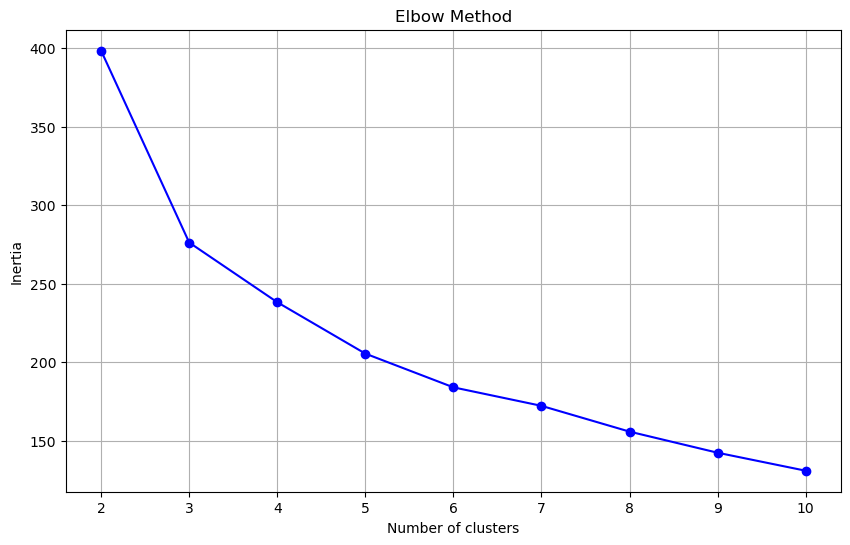

In [36]:
# Suppressing the warning about memory leak on Windows with MKL
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

inertia = []
silhouette_scores = []
range_values = range(2, 11)

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42,n_init=10)
    kmeans.fit(dataframe_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(dataframe_scaled, kmeans.labels_))

# Plotting the Elbow Method graph

plt.figure(figsize=(10, 6))
plt.plot(range_values, inertia, '-o', color='blue')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range_values)
plt.grid(True)
plt.show()



The inertia graph shows a noticeable bend at 3 clusters, indicating that beyond this point, the decrease in inertia (sum of squared distances to the nearest cluster center) becomes less significant. This suggests that 3 clusters might be a good choice.

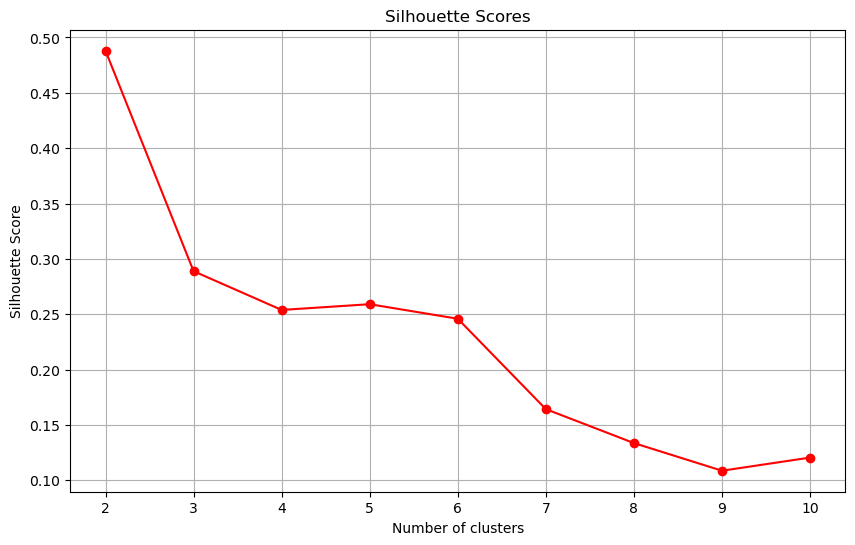

In [45]:
# Plotting the Silhouette Scores

plt.figure(figsize=(10, 6))
plt.plot(range_values, silhouette_scores, '-o', color='red')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_values)
plt.grid(True)
plt.show()

The silhouette scores, which measure how similar an object is to its own cluster compared to other clusters, peak at 3 clusters as well. This indicates that the clustering solution with 3 clusters has, on average, better-defined clusters.

Both methods suggest that 3 clusters would be the optimal number for this dataset, providing a balance between cluster cohesion and separation.

In [46]:
# Running K-means clustering with 3 clusters

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(dataframe_scaled)

# Adding the cluster labels to the original dataframe

dataframe.loc[:, 'Cluster'] = kmeans.labels_

dataframe.head()

,InboundRatio,InternationalStudentsNO,KOFPoGI,KOFEcGI,KOFSoGI,ISCED5 Percentage,ISCED6 Percentage,ISCED7 Percentage,ISCED8 Percentage,top_50_count,top_100_count,top_500_count,top_1000_count,Cluster
0,3.50011,116330,91,48,72,18.103877,68.238077,8.368618,0.737339,0,1,5,15,2
1,28.37490,509160,88,68,88,25.407825,65.591820,21.327540,3.624852,5,7,25,37,0
2,17.64123,74631,95,83,88,15.080255,40.310180,27.126033,3.959066,0,0,5,8,0
3,10.04272,52143,96,89,86,3.399620,58.107011,15.999636,2.631904,0,1,7,8,0
4,0.24504,21803,90,42,62,0.004350,53.314007,1.083925,0.734018,0,0,5,22,2


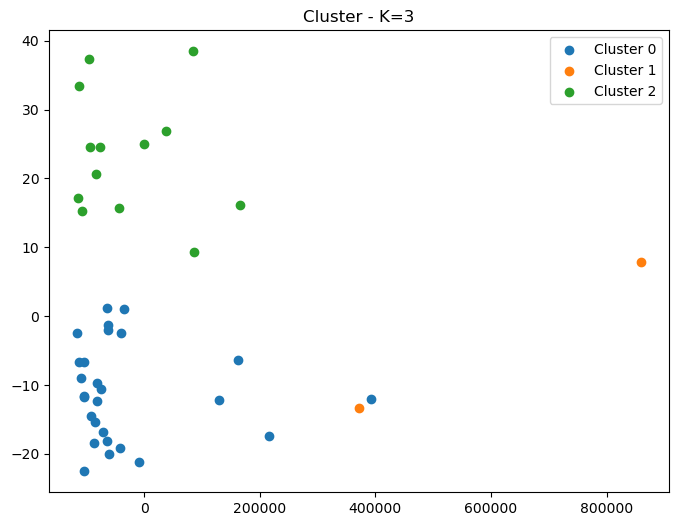

In [39]:
# Using PCA to reduce dimensionality and plot the clusters in two dimensions.

# Separating clusters

cluster_0 = dataframe[dataframe['Cluster'] == 0].drop('Cluster', axis=1)
cluster_1 = dataframe[dataframe['Cluster'] == 1].drop('Cluster', axis=1)
cluster_2 = dataframe[dataframe['Cluster'] == 2].drop('Cluster', axis=1)

# Applying PCA on all data

pca = PCA(n_components=2)
X_pca = pca.fit_transform(dataframe.drop('Cluster', axis=1))

# Applying PCA transformation to each cluster

cluster_0_pca = pca.transform(cluster_0)
cluster_1_pca = pca.transform(cluster_1)
cluster_2_pca = pca.transform(cluster_2)

# Plotting

plt.figure(figsize=(8, 6))
plt.scatter(cluster_0_pca[:, 0], cluster_0_pca[:, 1], label='Cluster 0')
plt.scatter(cluster_1_pca[:, 0], cluster_1_pca[:, 1], label='Cluster 1')
plt.scatter(cluster_2_pca[:, 0], cluster_2_pca[:, 1], label='Cluster 2')
plt.legend()
plt.title('Cluster - K=3')
plt.show()

The scatter plot with the first 2 PCs shows a clear difference between the clusters. However, minor overlapping could be seen bewteen cluster 0 and 1.

# Question 3 . C

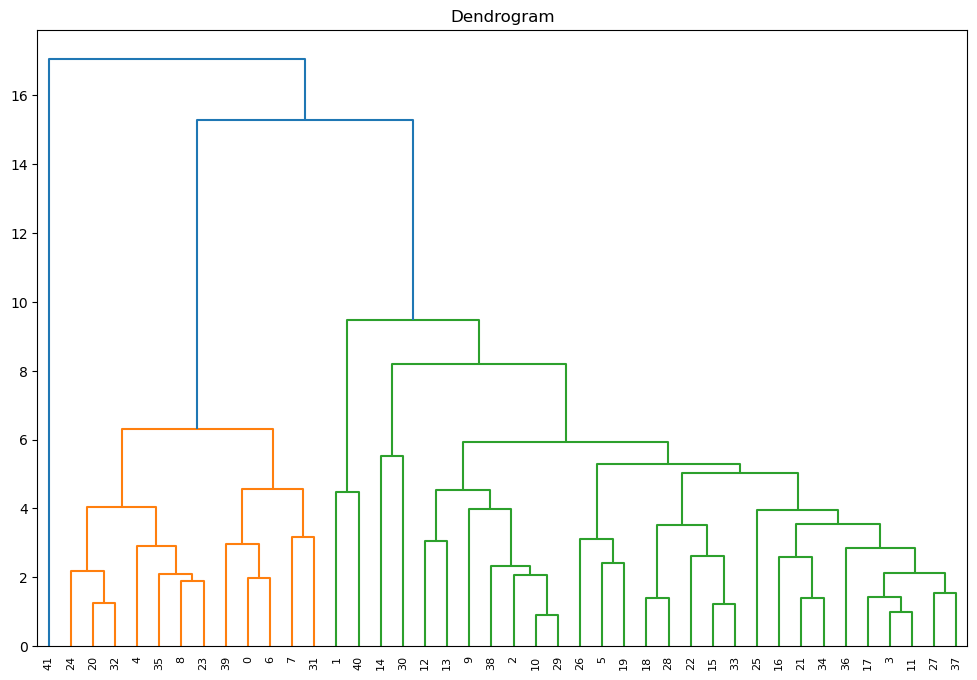

In [48]:
plt.figure(figsize=(12, 8)) 
dendrogram = hierarchy.dendrogram(hierarchy.linkage(dataframe_scaled, 
                                                    method='ward'), 
                                  labels=dataframe_scaled.index)
plt.title('Dendrogram')
plt.show()



In [41]:
model = AgglomerativeClustering(n_clusters=3, linkage="ward", 
                                compute_distances = True);
model.fit(dataframe_scaled);

dataframe.loc[:, "Cluster"] = model.labels_

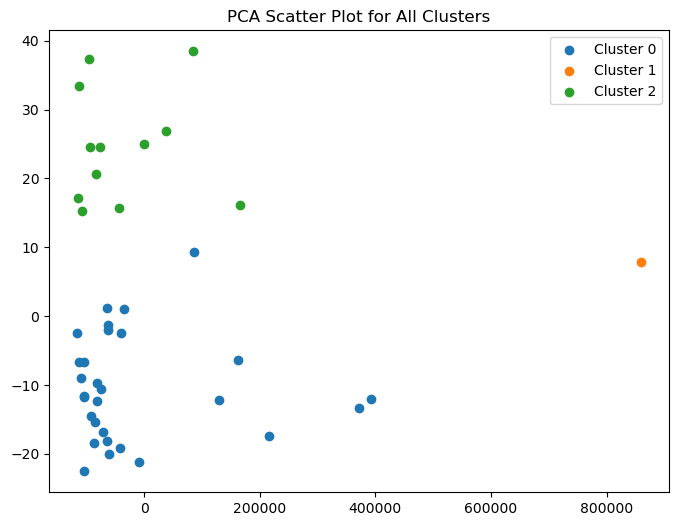

In [42]:
# Using PCA to reduce dimensionality and plot the clusters in two dimensions.

# Separating clusters

cluster_0 = dataframe[dataframe['Cluster'] == 0].drop('Cluster', axis=1)
cluster_1 = dataframe[dataframe['Cluster'] == 1].drop('Cluster', axis=1)
cluster_2 = dataframe[dataframe['Cluster'] == 2].drop('Cluster', axis=1)

# Applying PCA on all data

pca = PCA(n_components=2)
X_pca = pca.fit_transform(dataframe.drop('Cluster', axis=1))

# Applying PCA transformation to each cluster

cluster_0_pca = pca.transform(cluster_0)
cluster_1_pca = pca.transform(cluster_1)
cluster_2_pca = pca.transform(cluster_2)

# Plotting

plt.figure(figsize=(8, 6))
plt.scatter(cluster_0_pca[:, 0], cluster_0_pca[:, 1], label='Cluster 0')
plt.scatter(cluster_1_pca[:, 0], cluster_1_pca[:, 1], label='Cluster 1')
plt.scatter(cluster_2_pca[:, 0], cluster_2_pca[:, 1], label='Cluster 2')
plt.legend()
plt.title('PCA Scatter Plot for All Clusters')
plt.show()

The scatter plot with the first 2 PCs shows a clear difference between the clusters. There is no overlapping of clusters using this approach.

# Question 3 . D

The findings from both K-Means and Agglomerative Clustering analyses indicate that the optimal number of clusters for the dataset is three. This consistency across different clustering methods strengthens the confidence in the proposed clustering structure.  In the K-Means analysis, there is noticeable overlap or intermingling between Cluster 0 and Cluster 1. Such overlap implies that these clusters might share similar characteristics or features in the principal component space. In contrast, Agglomerative Clustering exhibited superior performance in segregating the clusters effectively, showcasing clearer boundaries between them.